# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


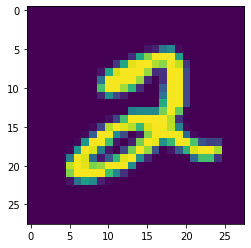

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()
i = 5
plt.imshow(X_train[i])
print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

### 2. Visualize the First Six Training Images

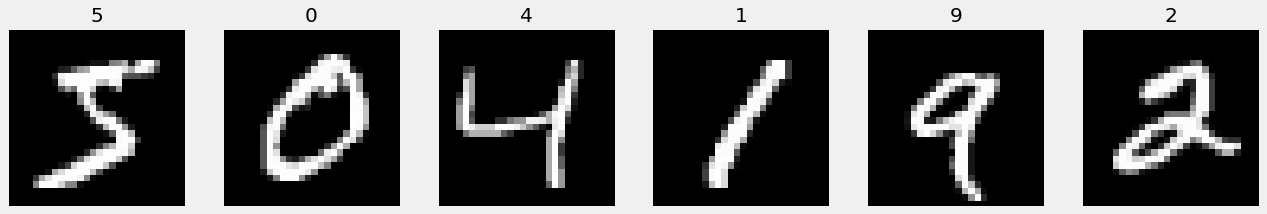

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

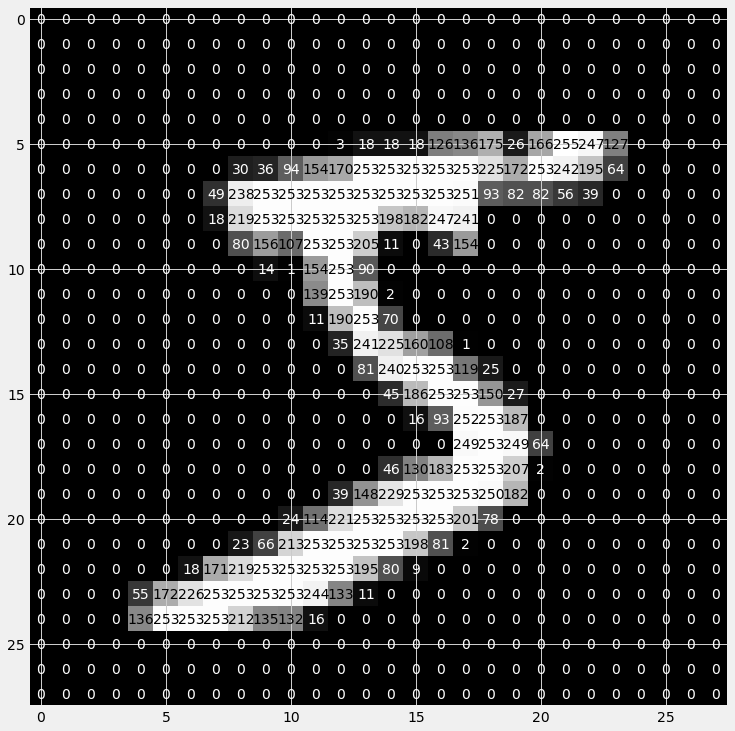

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [5]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trai

### 7. Compile the Model

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [8]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 0.1127%


### 9. Train the Model

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=2, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Epoch 1/10
374/375 [============================>.] - ETA: 0s - loss: 0.2733 - accuracy: 0.9160
Epoch 00001: val_loss improved from inf to 0.14076, saving model to mnist.model.best.hdf5
375/375 [==============================] - 4s 9ms/step - loss: 0.2730 - accuracy: 0.9161 - val_loss: 0.1408 - val_accuracy: 0.9559
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9657
Epoch 00002: val_loss improved from 0.14076 to 0.11037, saving model to mnist.model.best.hdf5
375/375 [==============================] - 3s 9ms/step - loss: 0.1129 - accuracy: 0.9657 - val_loss: 0.1104 - val_accuracy: 0.9678
Epoch 3/10
369/375 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 0.9754
Epoch 00003: val_loss improved from 0.11037 to 0.09093, saving model to mnist.model.best.hdf5
375/375 [==============================] - 3s 8ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.0909 - val_accuracy: 0.9744
Epoch 4/10
369/375 [=====================

# 10. Calculate the Classification Accuracy on the Test Set

In [10]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.0500%


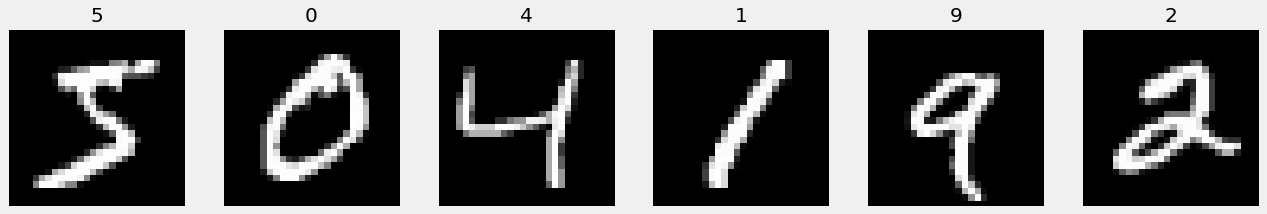

In [13]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test )  = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [15]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [16]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

model= Sequential()
model.add(Flatten(input_shape =X_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-tr

In [22]:
model.compile(optimizer ='adam',loss ='categorical_crossentropy',metrics=['accuracy'])

In [25]:
score =model.evaluate(x_test,y_test,verbose=0)

In [26]:
accuracy = score[1]

In [27]:
accuracy

0.16670000553131104

In [32]:
from keras.callbacks import ModelCheckpoint
model_check = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=2, save_best_only=True)
model.fit(x_train,y_train,verbose=1,batch_size = 128,callbacks=[model_check],validation_split=0.2,epochs=10)

Epoch 1/10
372/375 [============================>.] - ETA: 0s - loss: 0.0999 - accuracy: 0.9694
Epoch 00001: val_loss improved from inf to 0.10389, saving model to mnist.model.best.hdf5
375/375 [==============================] - 2s 6ms/step - loss: 0.0999 - accuracy: 0.9694 - val_loss: 0.1039 - val_accuracy: 0.9692
Epoch 2/10
373/375 [============================>.] - ETA: 0s - loss: 0.0917 - accuracy: 0.9715
Epoch 00002: val_loss improved from 0.10389 to 0.09781, saving model to mnist.model.best.hdf5
375/375 [==============================] - 2s 6ms/step - loss: 0.0918 - accuracy: 0.9715 - val_loss: 0.0978 - val_accuracy: 0.9712
Epoch 3/10
374/375 [============================>.] - ETA: 0s - loss: 0.0850 - accuracy: 0.9740
Epoch 00003: val_loss improved from 0.09781 to 0.09725, saving model to mnist.model.best.hdf5
375/375 [==============================] - 2s 6ms/step - loss: 0.0851 - accuracy: 0.9740 - val_loss: 0.0972 - val_accuracy: 0.9723
Epoch 4/10
369/375 [=====================

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=2, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)